In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class MagicCard():
    def __init__(self, startingPrice, meanPctChange, stdPctChange):
        self.currentPrice = startingPrice
        self.meanChange = meanPctChange
        self.stdChange = stdPctChange
    
    def getPrice(self):
        return self.currentPrice
    
    def updatePrice(self):
        self.currentPrice *= (1.0+self.meanChange + self.stdChange * np.random.randn())
        self.meanChange *= .99
    
    def updateAndGet(self):
        self.updatePrice()
        return self.getPrice()
    
    def updateDistribution(self, a, m):
        newMean = (np.random.pareto(a) + 1) * m 
        if np.random.rand()<.5:
            newMean *= -1
        self.meanChange = newMean
        
    
    def updateNTimesteps(self, n, returnHistory=None):
        history = [self.getPrice()]
        for i in range(n):
            updatedPrice = self.updateAndGet()
            if returnHistory:
                history.append(updatedPrice)
        if returnHistory:
            return history
        else:
            return None

commons mean and median and max and min:
0.012327101455025486
0.0023799439108428584
0.25345236066878124
5.458713652982195e-05
uncommons mean and median and max and min:
0.08855960193049292
0.029469706265845406
0.9774148371093252
0.00037149850789497277
rares mean and median and max and min:
1.1599123038646035
0.38390518599414253
14.278175247003507
0.009589394171169866
mythics mean and median and max and min:
2.6342255439005156
0.5911854853529276
18.52710946390254
0.016719178444233755


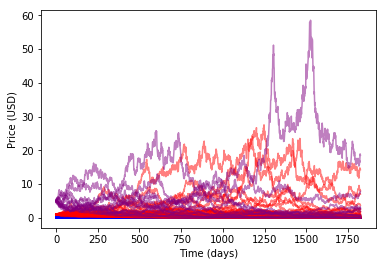

199


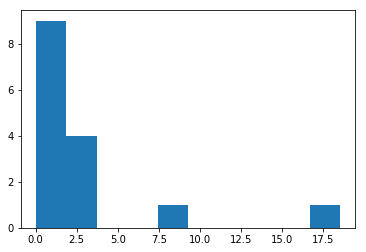

In [54]:
count = 0
finalPrices = []
finalArr = []
n_commons = 100
n_uncommons = 60
n_rares = 50
n_mythics = 15
years = 5
for x in range(n_commons):
    #print("x",x)
    arrs = []
    fB = MagicCard(0.01, 0.1/365, .04)
    for i in range(365*years):
        if i % 100 == 0:
            fB.updateDistribution(5, 1/365)
        arr = fB.updateAndGet()
        arrs.append(arr)
    plt.plot(arrs, alpha=0.5, color="green")
    finalPrices.append(arrs[-1])
    finalArr.append(arrs)
   # print("done")
    if arrs[-1]<1:
        count += 1
        
print("commons mean and median and max and min:")
print(np.mean(finalPrices))
print(np.median(finalPrices))
print(np.max(finalPrices))
print(np.min(finalPrices))

finalPrices = []
finalArr = []
for x in range(n_uncommons):
    #print("x",x)
    arrs = []
    fB = MagicCard(0.1, 0.1/365, .04)
    for i in range(365*years):
        if i % 100 == 0:
            fB.updateDistribution(5, 1/365)
        arr = fB.updateAndGet()
        arrs.append(arr)
    plt.plot(arrs, alpha=0.5, color="blue")
    finalPrices.append(arrs[-1])
    finalArr.append(arrs)
   # print("done")
    if arrs[-1]<1:
        count += 1
        
print("uncommons mean and median and max and min:")
print(np.mean(finalPrices))
print(np.median(finalPrices))
print(np.max(finalPrices))
print(np.min(finalPrices))
        
finalPrices = []
finalArr = []
for x in range(n_rares):
    #print("x",x)
    arrs = []
    fB = MagicCard(1, 0.1/365, .04)
    for i in range(365*years):
        if i % 100 == 0:
            fB.updateDistribution(5, 1/365)
        arr = fB.updateAndGet()
        arrs.append(arr)
    plt.plot(arrs, alpha=0.5, color="red")
    finalPrices.append(arrs[-1])
    finalArr.append(arrs)
   # print("done")
    if arrs[-1]<1:
        count += 1
print("rares mean and median and max and min:")
print(np.mean(finalPrices))
print(np.median(finalPrices))
print(np.max(finalPrices))
print(np.min(finalPrices))

finalPrices = []
finalArr = []
for x in range(n_mythics):
    #print("x",x)
    arrs = []
    fB = MagicCard(5, 0.1/365, .04)
    for i in range(365*years):
        if i % 100 == 0:
            fB.updateDistribution(5, 1/365)
        arr = fB.updateAndGet()
        arrs.append(arr)
    plt.plot(arrs, alpha=0.5, color="purple")
    finalPrices.append(arrs[-1])
    finalArr.append(arrs)
   # print("done")
print("mythics mean and median and max and min:")
print(np.mean(finalPrices))
print(np.median(finalPrices))
print(np.max(finalPrices))
print(np.min(finalPrices))
        
axes = plt.gca()
#axes.set_xlim([xmin,xmax])
#axes.set_ylim([0,0.10])
plt.ylabel("Price (USD)")
plt.xlabel("Time (days)")
plt.show()
print(count)
plt.close()
plt.figure()
plt.hist(finalPrices)
plt.show()

#plt.figure()
#plt.plot(np.mean(np.array(arrs), axis=0))
#plt.show()

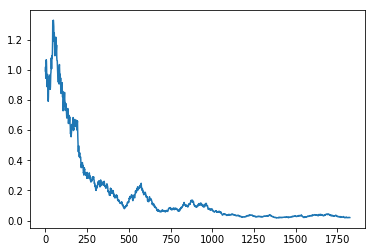

In [38]:
#a, m = 5, 1/365
#arr = (np.random.pareto(a, 100000)) * m 
#plt.hist(arr, 100)
plt.plot(np.array(finalArr)[174])
plt.show()
#print(arr.min(), arr.max())

In [46]:
import pandas as pd
#np.array(finalArr).shape
import datetime
numdays=3650
base = datetime.datetime.today()
date_list = [base + datetime.timedelta(days=x) for x in range(0, numdays)]
date_list = [x.strftime("%Y-%m-%d") for x in date_list]

In [47]:
mat = np.array(finalArr)
cards = pd.DataFrame(mat)

In [49]:
cards.columns=date_list
cards.to_csv("cards_database.csv")